In [139]:
pip install pymorphy3

In [140]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [141]:
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import pandas as pd
import glob
import string
import re
import pymorphy3
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio


pio.renderers.default = "notebook"  
nltk.download('punkt_tab') 
nltk.download('stopwords') 
nltk.download('punkt')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\EvaRiss_\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\EvaRiss_\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\EvaRiss_\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [142]:
df = pd.read_csv('PDF_dataset.csv')


df_desc = pd.read_csv('imdb_rating.csv')

df

,NameCompany,Description,Raiting,DataPublish,Activity,TextArticle
0,red_mad_robot,NaN,117.94,6 часов назад,№1 в разработке цифровых решений для бизнеса,"Средний18 минredmadrobotCocoapods, Carthage, S..."
1,OTUS,NaN,678.52,9 часов назад,Цифровые навыки от ведущих экспертов,"ПодписатьсяПривет, Хабр!Сегодня разберём неско..."
2,Cloud4Y,NaN,71.07,5 часов назад,#1 Корпоративный облачный провайдер,Автор оригинала: Yashwant SinghВзлом Instagram...
3,Cloud4Y,NaN,71.07,5 часов назад,#1 Корпоративный облачный провайдер,Автор оригинала: Yashwant SinghВзлом Instagram...
4,Postgres Professional,NaN,307.37,4 часа назад,Разработчик СУБД Postgres Pro,ПодписатьсяTDE и философия open sourceНачалось...
5,Sivchenko_translate,NaN,0.00,10 часов назад,NaN,Автор оригинала: Alex KladovВ этом посте будет...
6,MrShnaider,NaN,379.00,6 часов назад,NaN,Весь UI - это композиция MVCВ 1972 году лабора...
7,SergeyProkhorenko,NaN,295.00,3 часа назад,NaN,Основной сценарийПредставим себе такой сценари...
8,trrerg,NaN,770.00,10 часов назад,NaN,"Автор оригинала: Брайан Кукси (Brian Cooksey),..."
9,CDN,NaN,454.00,10 часов назад,Сегодня я хотел бы поговорить с тобой о пробле...,этом говорить? Ежедневно миллионы людей публик...


### Предобработка текстовых данных

In [144]:
def remove_punctuation(text): 
    return "".join([ch if ch not in string.punctuation else ' ' for ch in text])

def remove_numbers(text): 
    return ''.join([i if not i.isdigit() else ' ' for i in text])

def remove_multiple_spaces(text): 
    return re.sub(r'\s+', ' ', text, flags=re.I)

st = '❯\xa0—«»'
def remove_othersymbol(text):
    return ''.join([ch if ch not in st else ' ' for ch in text])

In [145]:
df['TextArticle'] = [remove_multiple_spaces(remove_numbers(remove_othersymbol(remove_punctuation(str(text).lower())))) for text in df['TextArticle']]
df_desc['Описание'] = [remove_multiple_spaces(remove_numbers(remove_othersymbol(remove_punctuation(str(text).lower())))) for text in df_desc['Описание']]

df['TextArticle'][0]

# убрал пунктуацию и сделал lower_case для основного текста статьи


'средний минredmadrobotcocoapods carthage spm как выбратьменеджер зависимостей в ios блог компании red mad robot разработка под ios faqкак стать автором'

In [146]:
russian_stopwords = stopwords.words('russian') 

def tokenize(text):
    t = word_tokenize(text)
    tokens = [token for token in t if token not in russian_stopwords]
    return " ".join(tokens)

In [147]:
df['tokenize_text'] = [tokenize(text) for text in df['TextArticle']]

df_desc['tokenize_text_desc'] = [tokenize(text) for text in df_desc['Описание']]


df['tokenize_text'].head(5)

0    средний минredmadrobotcocoapods carthage spm в...
1    подписатьсяпривет хабр сегодня разберём нескол...
2    автор оригинала yashwant singhвзлом instagram ...
3    автор оригинала yashwant singhвзлом instagram ...
4    подписатьсяtde философия open sourceначалось в...
Name: tokenize_text, dtype: object

In [148]:
russian_stopwords = stopwords.words('russian') 

def remove_stopwords(text):
    text = [word for word in text if word not in russian_stopwords]
    return text

remove_stopwords(df['tokenize_text'])
remove_stopwords(df_desc['tokenize_text_desc'])

df['tokenize_text']


0     средний минredmadrobotcocoapods carthage spm в...
1     подписатьсяпривет хабр сегодня разберём нескол...
2     автор оригинала yashwant singhвзлом instagram ...
3     автор оригинала yashwant singhвзлом instagram ...
4     подписатьсяtde философия open sourceначалось в...
5     автор оригинала alex kladovв посте разобрано н...
6     весь ui это композиция mvcв году лаборатория x...
7     основной сценарийпредставим сценарий пользоват...
8     автор оригинала брайан кукси brian cooksey zap...
9     говорить ежедневно миллионы людей публикуют ми...
10    привлечения внимания расскажу историю лет живу...
11    первой статье разобрали такое платформа целом ...
12    подписатьсяв альфа банке внедрили ии агентов к...
13    автор оригинала lahiru hewawasamпростой минru ...
14    look use the source указывайте количественно к...
15    несмотря постепенно оптические диски уходят пр...
16    средний минartyomsoftкак создать аппаратный эм...
17    новостей blender balatro стала триумфаторо

In [149]:
stemmer = SnowballStemmer("russian")

stem_list = []
for text in (df['tokenize_text']):
    try:
        tokens = word_tokenize(text)
        res = list()
        for word in tokens:
            p = stemmer.stem(word)
            res.append(p)
        text = " ".join(res)
        stem_list.append(text)
        
    except Exception as e:
        print(e)
        
df['text_stem'] = stem_list

df['text_stem'].head(5)

0    средн минредмадроботcоcоаподс carthage spm выб...
1    подписатьсяпривет хабр сегодн разбер нескольк ...
2    автор оригина yashwant сингhвзл instagram ‑акк...
3    автор оригина yashwant сингhвзл instagram акка...
4    подписатьсятд философ open соурcенача все брюс...
Name: text_stem, dtype: object

In [150]:
morph = pymorphy3.MorphAnalyzer(lang='ru')

In [151]:
%%time
lemm_texts_list = []
for text in (df['tokenize_text']):
    try:
        tokens = word_tokenize(text)
        res = list()
        for word in tokens:
            p = morph.parse(word)[0]
            res.append(p.normal_form)
        text = " ".join(res)
        lemm_texts_list.append(text)
    except Exception as e:
        print(e)
        

    
df['text_lemm'] = lemm_texts_list

df['text_lemm'].head(5)

CPU times: total: 188 ms
Wall time: 259 ms


0    средний минredmadrobotcocoapods carthage spm в...
1    подписатьсяпривет хабра сегодня разобрать неск...
2    автор оригинал yashwant singhвзлом instagram ‑...
3    автор оригинал yashwant singhвзлом instagram а...
4    подписатьсяtde философия open sourceначаться в...
Name: text_lemm, dtype: object

In [152]:
stemmer = SnowballStemmer("russian")

stem_list = []
for text in (df_desc['tokenize_text_desc']):
    try:
        tokens = word_tokenize(text)
        res = list()
        for word in tokens:
            p = stemmer.stem(word)
            res.append(p)
        text = " ".join(res)
        stem_list.append(text)
        
    except Exception as e:
        print(e)
        
df_desc['text_stem_desc'] = stem_list

df_desc['text_stem_desc'].head(5)

0    побе́г шоуше́нк англ the shawshank redemption ...
1                                  крестн оте́ц означа
2    темн ры́цар англ the dark knight американск по...
3    крестн оте́ц англ the godfather part ii америк...
4         разгнева мужчин англ twelve angry men означа
Name: text_stem_desc, dtype: object

In [153]:
%%time
lemm_texts_list = []
for text in (df_desc['tokenize_text_desc']):
    try:
        tokens = word_tokenize(text)
        res = list()
        for word in tokens:
            p = morph.parse(word)[0]
            res.append(p.normal_form)
        text = " ".join(res)
        lemm_texts_list.append(text)
    except Exception as e:
        print(e)
        

    
df_desc['text_lemm_desc'] = lemm_texts_list

df_desc['text_lemm_desc'].head(5)

CPU times: total: 750 ms
Wall time: 1.05 s


0    побе́г шоуше́нка англ the shawshank redemption...
1                             крёстный оте́ца означать
2    тёмный ры́царь англ the dark knight американск...
3    крёстный оте́ца англ the godfather part ii аме...
4    разгневать мужчина англ twelve angry men означать
Name: text_lemm_desc, dtype: object

In [154]:


import re
from collections import Counter

def remove_most_common_words(text, num_words=10):
   
    words = re.findall(r"\b[a-zA-Zа-яА-ЯёЁ]+\b", text.lower())
    
    word_counts = Counter(words)
    
    most_common = [word for word, count in word_counts.most_common(num_words)]

    #print(word_counts)
    
    pattern = re.compile(r"\b(" + "|".join(map(re.escape, most_common)) + r")\b", flags=re.IGNORECASE)
    cleaned_text = pattern.sub("", text)
    
    cleaned_text = re.sub(r"\s+", " ", cleaned_text).strip()

    return cleaned_text



df['text_lemm_clear'] = [remove_most_common_words(text, 5) for text in df['text_lemm']]
df_desc['text_lemm_desc_clear'] = [remove_most_common_words(text, 5) for text in df_desc['text_lemm_desc']]
df['text_stem_clear'] = [remove_most_common_words(text, 5) for text in df['text_stem']]
df_desc['text_stem_desc_clear'] = [remove_most_common_words(text, 5) for text in df_desc['text_stem_desc']]


df['text_lemm_clear'].head(10)

df_desc['text_lemm_desc_clear'].head(10)

0    ́ шоуше́нка англ the shawshank redemption иску...
1                                                    ́
2    ры́царь англ the dark knight американский полн...
3    оте́ца англ the godfather part ii американский...
4                                         men означать
5    властели́н коле́ца возвраще́ние короля́ англ l...
6    ́ ́ндлера schindler s list американский эпичес...
7    кримина́льный чти́вый англ fiction бульварный ...
8    властели́н коле́ца бра́тство кольца́ англ lord...
9    ́ плохо́ть злой итал buono brutto cattivo англ...
Name: text_lemm_desc_clear, dtype: object

In [155]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline


# Получение текстовой строки из списка слов
def str_corpus(corpus):
    str_corpus = ''
    for i in corpus:
        str_corpus += ' ' + i
    str_corpus = str_corpus.strip()
    return str_corpus

# Получение списка всех слов в корпусе
def get_corpus(data):
    corpus = []
    for phrase in data:
        for word in phrase.split():
            corpus.append(word)
    return corpus

# Получение облака слов
def get_wordCloud(corpus):
    wordCloud = WordCloud(background_color='white',
                              stopwords=STOPWORDS,
                              width=3000,
                              height=2500,
                              max_words=200,
                              random_state=42
                         ).generate(str_corpus(corpus))
    return wordCloud

### Облако слов лемматизированного текста

<Axes: >

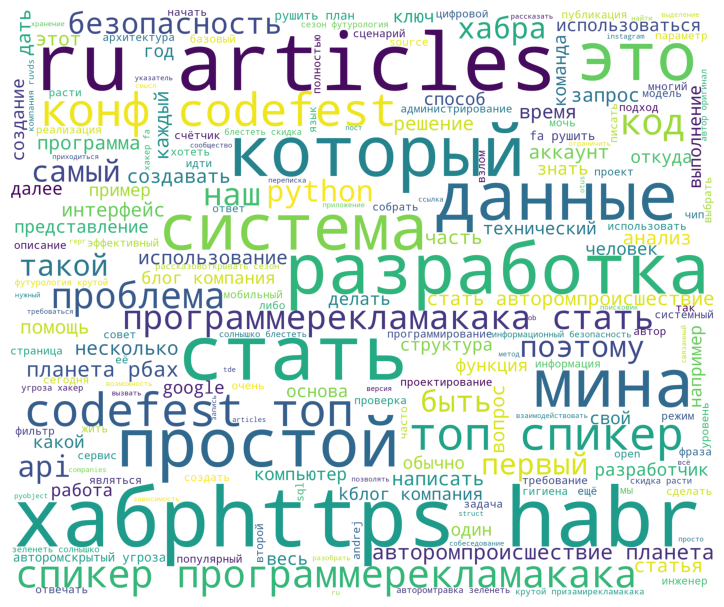

In [157]:
corpus = get_corpus(df['text_lemm_clear'].values)
procWordCloud = get_wordCloud(corpus)

fig = plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.imshow(procWordCloud)
plt.axis('off')
plt.subplot(1, 2, 1)

### Облако слов стеммингованного текста

<Axes: >

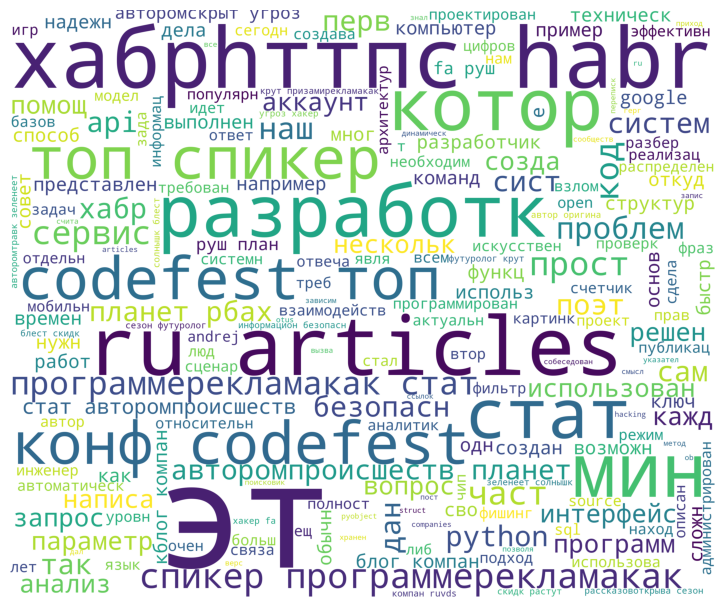

In [159]:

corpus = get_corpus(df['text_stem_clear'].values)
procWordCloud = get_wordCloud(corpus)

fig = plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.imshow(procWordCloud)
plt.axis('off')
plt.subplot(1, 2, 1)

<Axes: >

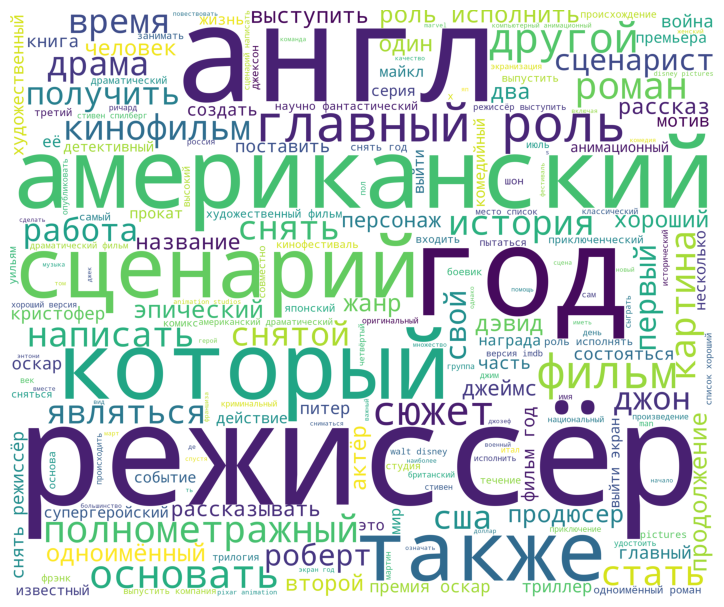

In [160]:
corpus = get_corpus(df_desc['text_lemm_desc_clear'].values)
procWordCloud = get_wordCloud(corpus)

fig = plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.imshow(procWordCloud)
plt.axis('off')
plt.subplot(1, 2, 1)

<Axes: >

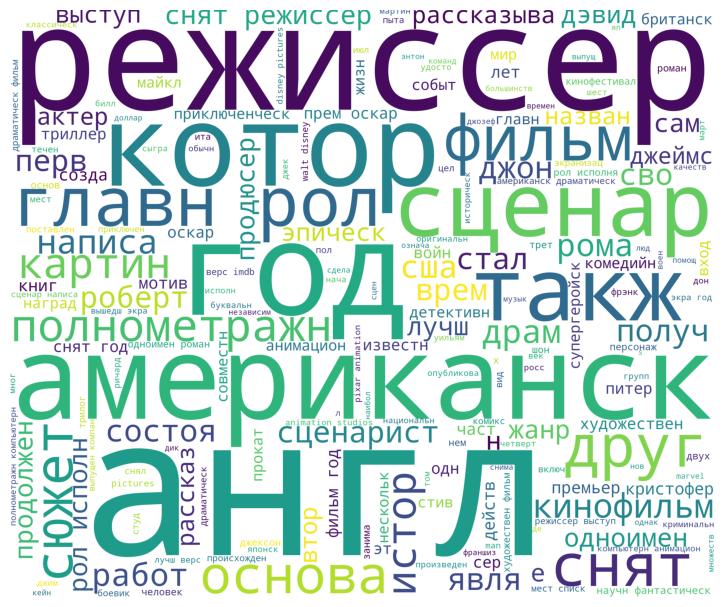

In [161]:
corpus = get_corpus(df_desc['text_stem_desc_clear'].values)
procWordCloud = get_wordCloud(corpus)

fig = plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.imshow(procWordCloud)
plt.axis('off')
plt.subplot(1, 2, 1)

# Тематическое моделирование

In [163]:
def tokenize2(text):
    if isinstance(text, list):  
        return text  
    if not isinstance(text, str):  
        return []  
    
    tokens = word_tokenize(text.lower(), language='russian')
    tokens = [token for token in tokens 
              if token not in russian_stopwords and len(token) >= 2]
    return tokens  

In [164]:
pip install pyLDAvis

Note: you may need to restart the kernel to use updated packages.


In [165]:
import gensim

df_desc['text_lemm_desc_clear_tokenize'] = [tokenize2(text) for text in df_desc['text_lemm_desc_clear']]
df_desc['text_stem_desc_clear_tokenize'] = [tokenize2(text) for text in df_desc['text_stem_desc_clear']]

df['text_stem_clear_tokenize'] = [tokenize2(text) for text in df['text_stem_clear']]
df['text_lemm_clear_tokenize'] = [tokenize2(text) for text in df['text_lemm_clear']]
        


gensim_dictionary = gensim.corpora.Dictionary(df_desc['text_lemm_desc_clear_tokenize'])
gensim_dictionary.filter_extremes(no_above=0.5, no_below=5)
gensim_dictionary.compactify()


gensim_dictionary1 = gensim.corpora.Dictionary(df['text_lemm_clear_tokenize'])
gensim_dictionary1.filter_extremes(no_above=0.5, no_below=5)
gensim_dictionary1.compactify()

gensim_dictionary2 = gensim.corpora.Dictionary(df['text_stem_clear_tokenize'])
gensim_dictionary2.filter_extremes(no_above=0.5, no_below=5)
gensim_dictionary2.compactify()


corpus = [gensim_dictionary.doc2bow(text) 
          for text in df_desc['text_lemm_desc_clear_tokenize']]  # лемматизированные описания фильмов

corpus1 = [gensim_dictionary.doc2bow(text) 
          for text in df_desc['text_stem_desc_clear_tokenize']]  # описания фильмов после стемминга

corpus2 = [gensim_dictionary1.doc2bow(text) 
          for text in df['text_lemm_clear_tokenize']]       # лемматизированные описания статей

corpus3 = [gensim_dictionary2.doc2bow(text) 
          for text in df['text_stem_clear_tokenize']]       # описания статей после стемминга



In [166]:
lda_20 = gensim.models.LdaMulticore(corpus, 
                                 num_topics=10, 
                                 id2word=gensim_dictionary, 
                                 passes=10, random_state=6457)

lda_20.print_topics()

[(0,
  '0.050*"англ" + 0.040*"the" + 0.033*"который" + 0.030*"американский" + 0.028*"режиссёр" + 0.027*"сша" + 0.027*"сценарий" + 0.026*"снять" + 0.026*"год" + 0.024*"время"'),
 (1,
  '0.060*"год" + 0.059*"режиссёр" + 0.043*"фильм" + 0.037*"драматический" + 0.034*"англ" + 0.034*"американский" + 0.032*"выйти" + 0.029*"of" + 0.028*"основать" + 0.022*"экран"'),
 (2,
  '0.030*"сюжет" + 0.028*"вселенная" + 0.028*"режиссёр" + 0.025*"полнометражный" + 0.024*"основать" + 0.023*"супергеройский" + 0.023*"американский" + 0.023*"который" + 0.022*"англ" + 0.021*"помощь"'),
 (3,
  '0.042*"хороший" + 0.029*"режиссёр" + 0.027*"оскар" + 0.025*"премия" + 0.024*"написать" + 0.022*"полнометражный" + 0.021*"англ" + 0.020*"роман" + 0.019*"награда" + 0.018*"высокий"'),
 (4,
  '0.051*"также" + 0.037*"англ" + 0.035*"человек" + 0.031*"хороший" + 0.024*"the" + 0.023*"версия" + 0.021*"иметь" + 0.018*"режиссёр" + 0.018*"год" + 0.017*"получить"'),
 (5,
  '0.041*"режиссёр" + 0.031*"самый" + 0.029*"год" + 0.026*"втор

In [167]:
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis

In [168]:
vis_20 = gensimvis.prepare(lda_20, corpus, gensim_dictionary)

pyLDAvis.enable_notebook()

# LDA для habr статей

In [170]:
vis_20

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
7      0.070661  0.017452       1        1  18.765348
6      0.071998  0.009832       2        1  13.252498
3     -0.083143 -0.035850       3        1  10.630344
5     -0.087733  0.089427       4        1  10.293903
0     -0.031575  0.118541       5        1   9.591605
9      0.122347 -0.007893       6        1   9.118645
2      0.109108  0.058184       7        1   8.420481
1      0.007686 -0.069948       8        1   7.261118
4     -0.182901 -0.013195       9        1   6.564682
8      0.003553 -0.166551      10        1   6.101378, topic_info=              Term       Freq      Total Category  logprob  loglift
125        хороший  29.000000  29.000000  Default  30.0000  30.0000
9          который  47.000000  47.000000  Default  29.0000  29.0000
14            свой  14.000000  14.000000  Default  28.0000  28.0000
6    драматический  20.000000  20.000000  Default  27.0000  27.0000
97            роль  44.000000  44.000000  Default  26.0000  26.0000
..             ...        ...        ...      ...      ...      ...
13        режиссёр   4.612171  90.697488  Topic10  -3.5745  -0.1822
92         главный   3.182779  46.198469  Topic10  -3.9455   0.1215
65        сценарий   2.926601  43.613912  Topic10  -4.0294   0.0951
4              год   3.601460  79.484990  Topic10  -3.8219  -0.2976
19           фильм   2.579438  54.696168  Topic10  -4.1557  -0.2576

[475 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
89        1  0.239670        and
89        2  0.239670        and
89        5  0.359505        and
89        9  0.119835        and
168       1  0.581282  animation
...     ...       ...        ...
156       4  0.177932         яп
156       8  0.177932         яп
137       2  0.361350   японский
137       8  0.361350   японский
137      10  0.240900   японский

[903 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[8, 7, 4, 6, 1, 10, 3, 2, 5, 9])

In [171]:
lda_21 = gensim.models.LdaMulticore(corpus2, 
                                 num_topics=10, 
                                 id2word=gensim_dictionary1, 
                                 passes=10, random_state=6457)


vis_21 = gensimvis.prepare(lda_21, corpus2, gensim_dictionary1)

pyLDAvis.enable_notebook()

# LDA для описания фильмов

In [173]:
vis_21

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.157292 -0.109136       1        1  28.013381
8     -0.148542  0.002794       2        1  25.446800
0     -0.213114  0.142986       3        1  10.385135
7      0.047341 -0.014174       4        1   8.185099
6     -0.226128 -0.038345       5        1   7.820138
2      0.189415  0.118421       6        1   7.380820
9      0.130354  0.161167       7        1   4.556667
4     -0.041346 -0.165802       8        1   3.834114
1      0.108689 -0.094354       9        1   3.379437
5     -0.003961 -0.003556      10        1   0.998409, topic_info=          Term       Freq      Total Category  logprob  loglift
23     система   8.000000   8.000000  Default  27.0000  27.0000
2     компания  10.000000  10.000000  Default  26.0000  26.0000
3   разработка  10.000000  10.000000  Default  25.0000  25.0000
25      данные  10.000000  10.000000  Default  24.0000  24.0000
9      поэтому   6.000000   6.000000  Default  23.0000  23.0000
..         ...        ...        ...      ...      ...      ...
25      данные   0.079873  10.090849  Topic10  -3.2958  -0.2322
4      который   0.079873  10.220302  Topic10  -3.2958  -0.2449
2     компания   0.079873  10.223149  Topic10  -3.2958  -0.2452
7          это   0.079873  10.238294  Topic10  -3.2958  -0.2467
3   разработка   0.079873  10.434184  Topic10  -3.2958  -0.2656

[297 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
16        2  0.430312  codefest
16        3  0.215156  codefest
16        5  0.215156  codefest
0         1  0.620960     автор
0         2  0.155240     автор
...     ...       ...       ...
6         7  0.157677     хабра
7         1  0.390690       это
7         2  0.390690       это
7         6  0.097673       это
7         7  0.097673       это

[91 rows x 3 columns], R=27, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 9, 1, 8, 7, 3, 10, 5, 2, 6])

# Векторизация 

In [246]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
vectorizer.fit(df['text_lemm'])

print(vectorizer.vocabulary_)


{'средний': 1193, 'минredmadrobotcocoapods': 630, 'carthage': 14, 'spm': 133, 'выбратьменеджер': 320, 'зависимость': 435, 'ios': 53, 'блог': 227, 'компания': 561, 'red': 112, 'mad': 75, 'robot': 117, 'разработка': 1033, 'faqкак': 37, 'стать': 1200, 'автор': 172, 'подписатьсяпривет': 866, 'хабра': 1325, 'сегодня': 1108, 'разобрать': 1030, 'несколько': 717, 'вопрос': 295, 'собеседование': 1145, 'связанный': 1102, 'устройствомcpython': 1295, 'api': 4, 'python': 104, 'взаимодействовать': 269, 'pyobject': 103, 'cpython': 28, 'каждый': 530, 'объект': 756, 'это': 1372, 'структура': 1211, 'унаследовать': 1280, 'базовый': 213, 'typedef': 145, 'struct': 137, 'object': 87, 'py': 102, 'ssize': 135, 'ob': 85, 'refcnt': 114, 'счётчик': 1220, 'ссылка': 1195, 'typeobject': 146, 'type': 144, 'указатель': 1273, 'тип': 1243, 'отвечать': 796, 'управление': 1284, 'жизненный': 428, 'цикл': 1339, 'новыйуказатель': 731, 'увеличивать': 1266, 'удаление': 1270, 'уменьшаться': 1278, 'достигать': 408, 'нуль': 739,

In [247]:
vectorizer.get_feature_names_out()[10:20]

array(['badcasedaily', 'balatro', 'blender', 'brian', 'carthage', 'cd',
       'celery', 'clickhouse', 'cloud', 'codefest'], dtype=object)

In [248]:
from gensim.utils import simple_preprocess

def text_to_vector(text, model):
    words = simple_preprocess(text)
    word_vectors = [model.wv[word] for word in words if word in model.wv]
    if len(word_vectors) == 0:
        return np.zeros(model.vector_size)
    return np.mean(word_vectors, axis=0)

In [249]:
vectorizer = CountVectorizer(analyzer='word', stop_words=russian_stopwords, ngram_range=(1, 3), min_df=2)

df_desc['text_lemm_desc_clear_str'] = df_desc['text_lemm_desc_clear_tokenize'].apply(' '.join)
df['text_lemm_clear_str'] = df['text_lemm_clear_tokenize'].apply(' '.join)
df_desc['text_stem_desc_clear_str'] = df_desc['text_stem_desc_clear_tokenize'].apply(' '.join)
df['text_stem_clear_str'] = df['text_stem_clear_tokenize'].apply(' '.join)

count_matrix_lemm = vectorizer.fit_transform(df['text_lemm_clear_str'])
count_matrix_stem = vectorizer.fit_transform(df['text_stem_clear_str'])

count_matrix_lemm_desc = vectorizer.fit_transform(df_desc['text_lemm_desc_clear_str'])
count_matrix_stem_desc = vectorizer.fit_transform(df_desc['text_stem_desc_clear_str'])


count_matrix_lemm.shape

(25, 401)

In [250]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=10000,
                                 min_df=0.01, stop_words=russian_stopwords,
                                 ngram_range=(1,3))



tfidf_matrix_lemm = tfidf_vectorizer.fit_transform(df['text_lemm_clear_str'])
tfidf_matrix_stem = tfidf_vectorizer.fit_transform(df['text_stem_clear_str'])

tfidf_matrix_lemm_desc = tfidf_vectorizer.fit_transform(df_desc['text_lemm_desc_clear_str'])
tfidf_matrix_stem_desc = tfidf_vectorizer.fit_transform(df_desc['text_stem_desc_clear_str'])

In [251]:
print("TF-IDF samples:", tfidf_matrix_lemm.shape[0])

TF-IDF samples: 25


## 2d визуализация кластеров 

In [253]:
from sklearn.manifold import TSNE
def plot_tsne_optimized(X, title, texts, perplexity=None, text_length=20):
    """
    Визуализация t-SNE с автоматической настройкой для малых датасетов
    
    Параметры:
        X - матрица признаков (TF-IDF)
        title - заголовок графика
        texts - список текстов для аннотаций
        perplexity - ручная установка (None для авто)
    """
    n_samples = X.shape[0]
    
    if perplexity is None:
        perplexity = min(5, n_samples - 1)  
    
    if hasattr(X, 'toarray'):
        X = X.toarray()
    
    tsne = TSNE(
        n_components=2,
        perplexity=perplexity,
        random_state=42,
        learning_rate=50, 
        init='pca'  
    )
    
    X_2d = tsne.fit_transform(X)
    
    plt.figure(figsize=(10, 8))
    scatter = plt.scatter(X_2d[:, 0], X_2d[:, 1], alpha=0.7)
    
    for i, (x, y) in enumerate(X_2d):
        plt.annotate(
            str(texts[i])[:text_length] + ("..." if len(str(texts[i])) > text_length else ""), 
            (x, y),
            fontsize=8,
            alpha=0.8,
            xytext=(10, 10),
            textcoords='offset points'
        )
    
    plt.title(f"{title}\nperplexity={perplexity}, n_samples={n_samples}")
    plt.grid(True, alpha=0.2)
    plt.show()


In [254]:

def plot_tsne_optimized_big_data(X, title, texts=None, hover_texts=None, perplexity=None, text_length=20, 
                     n_components=2, max_annotations=100, figsize=(12, 10),
                     use_hdbscan=True, min_cluster_size=5, random_state=42,
                     use_interactive=True, learning_rate='auto'):
    import numpy as np
    import matplotlib.pyplot as plt
    from sklearn.manifold import TSNE
    from sklearn.decomposition import PCA
    import warnings
    warnings.filterwarnings('ignore')
    
    if hasattr(X, 'toarray'):
        X = X.toarray()
    
    n_samples = X.shape[0]
    
    if perplexity is None:
        perplexity = min(max(5, n_samples // 100), 50)
    
    if n_samples > 10000:
        print(f"Предварительное снижение размерности с PCA до 50 компонент (исходная размерность: {X.shape[1]})")
        pca = PCA(n_components=min(50, X.shape[1]), random_state=random_state)
        X = pca.fit_transform(X)
    
    print(f"Запуск t-SNE с perplexity={perplexity} на {n_samples} образцах...")
    
    tsne = TSNE(
        n_components=n_components,
        perplexity=perplexity,
        random_state=random_state,
        learning_rate=learning_rate,
        init='pca',
        n_iter=1000,
        n_jobs=-1,
        method='barnes_hut' if n_samples < 10000 else 'fft'
    )
    
    X_reduced = tsne.fit_transform(X)
    
    colors = None
    cluster_labels = None
    
    if use_hdbscan and n_samples > 50:
        try:
            from hdbscan import HDBSCAN
            print(f"Применение HDBSCAN кластеризации (min_cluster_size={min_cluster_size})...")
            clusterer = HDBSCAN(min_cluster_size=min_cluster_size, min_samples=1, gen_min_span_tree=True)
            cluster_labels = clusterer.fit_predict(X_reduced)
            
            from matplotlib.colors import ListedColormap
            n_clusters = len(set(cluster_labels)) - (1 if -1 in cluster_labels else 0)
            cmap = plt.cm.get_cmap('tab20', max(n_clusters, 2))
            colors_list = [cmap(i) for i in range(n_clusters)]
            colors_list.insert(0, (0.7, 0.7, 0.7, 0.5))
            colors = ListedColormap(colors_list)
            print(f"Найдено {n_clusters} кластеров")
        except ImportError:
            print("Библиотека HDBSCAN не установлена. Используется визуализация без кластеризации.")
            use_hdbscan = False
    
    if use_interactive and n_samples > 100:
        try:
            import plotly.express as px
            import plotly.graph_objects as go
            
            if n_components == 3:
                if use_hdbscan and cluster_labels is not None:
                    fig = px.scatter_3d(
                        x=X_reduced[:, 0], y=X_reduced[:, 1], z=X_reduced[:, 2],
                        color=cluster_labels.astype(str),
                        title=f"{title}<br>perplexity={perplexity}, n_samples={n_samples}, clusters={len(set(cluster_labels)) - (1 if -1 in cluster_labels else 0)}",
                        labels={'color': 'Cluster'},
                        hover_name=hover_texts if hover_texts is not None else None,
                        hover_data={'text': texts if texts is not None else None} if hover_texts is None else None
                    )
                else:
                    fig = px.scatter_3d(
                        x=X_reduced[:, 0], y=X_reduced[:, 1], z=X_reduced[:, 2],
                        title=f"{title}<br>perplexity={perplexity}, n_samples={n_samples}",
                        hover_name=hover_texts if hover_texts is not None else None,
                        hover_data={'text': texts if texts is not None else None} if hover_texts is None else None
                    )
                
                if texts is not None:
                    indices_to_annotate = []
                    
                    if use_hdbscan and cluster_labels is not None:
                        unique_clusters = set(cluster_labels)
                        for c in unique_clusters:
                            cluster_indices = np.where(cluster_labels == c)[0]
                            if len(cluster_indices) > 0:
                                cluster_points = X_reduced[cluster_indices]
                                centroid = np.mean(cluster_points, axis=0)
                                distances = np.sum((cluster_points - centroid) ** 2, axis=1)
                                closest_indices = cluster_indices[np.argsort(distances)[:min(3, len(cluster_indices))]]
                                indices_to_annotate.extend(closest_indices)
                    else:
                        indices_to_annotate = np.linspace(0, n_samples-1, min(max_annotations, n_samples)).astype(int)
                    
                    for i in indices_to_annotate:
                        if i < len(texts):
                            text = str(texts[i])[:text_length] + ("..." if len(str(texts[i])) > text_length else "")
                            fig.add_trace(go.Scatter3d(
                                x=[X_reduced[i, 0]], y=[X_reduced[i, 1]], z=[X_reduced[i, 2]],
                                mode='markers+text',
                                marker=dict(size=5, opacity=0.8),
                                text=[text],
                                name=text,
                                showlegend=False
                            ))
                
                fig.update_layout(width=figsize[0]*100, height=figsize[1]*100)
            else:
                if use_hdbscan and cluster_labels is not None:
                    fig = px.scatter(
                        x=X_reduced[:, 0], y=X_reduced[:, 1],
                        color=cluster_labels.astype(str),
                        title=f"{title}<br>perplexity={perplexity}, n_samples={n_samples}, clusters={len(set(cluster_labels)) - (1 if -1 in cluster_labels else 0)}",
                        labels={'color': 'Cluster'},
                        hover_name=hover_texts if hover_texts is not None else None,
                        hover_data={'text': texts if texts is not None else None} if hover_texts is None else None
                    )
                else:
                    fig = px.scatter(
                        x=X_reduced[:, 0], y=X_reduced[:, 1],
                        title=f"{title}<br>perplexity={perplexity}, n_samples={n_samples}",
                        hover_name=hover_texts if hover_texts is not None else None,
                        hover_data={'text': texts if texts is not None else None} if hover_texts is None else None
                    )
                
                if texts is not None:
                    indices_to_annotate = []
                    
                    if use_hdbscan and cluster_labels is not None:
                        unique_clusters = set(cluster_labels)
                        for c in unique_clusters:
                            cluster_indices = np.where(cluster_labels == c)[0]
                            if len(cluster_indices) > 0:
                                cluster_points = X_reduced[cluster_indices]
                                centroid = np.mean(cluster_points, axis=0)
                                distances = np.sum((cluster_points - centroid) ** 2, axis=1)
                                n_points = min(max(1, len(cluster_indices) // 10), 5)
                                closest_indices = cluster_indices[np.argsort(distances)[:n_points]]
                                indices_to_annotate.extend(closest_indices)
                    else:
                        indices_to_annotate = np.linspace(0, n_samples-1, min(max_annotations, n_samples)).astype(int)
                    
                    annotations = []
                    for i in indices_to_annotate:
                        if i < len(texts):
                            text = str(texts[i])[:text_length] + ("..." if len(str(texts[i])) > text_length else "")
                            annotations.append(dict(
                                x=X_reduced[i, 0],
                                y=X_reduced[i, 1],
                                text=text,
                                showarrow=True,
                                arrowhead=1,
                                ax=20,
                                ay=-20,
                                font=dict(size=10)
                            ))
                    
                    fig.update_layout(annotations=annotations[:max_annotations])
                
                fig.update_layout(width=figsize[0]*100, height=figsize[1]*100)
            
            fig.show()
            print("Интерактивный график построен с помощью Plotly")
            
            return X_reduced, cluster_labels if use_hdbscan else None
            
        except ImportError:
            print("Библиотека Plotly не установлена. Используется matplotlib для визуализации.")
    
    plt.figure(figsize=figsize)
    
    if use_hdbscan and cluster_labels is not None:
        scatter = plt.scatter(
            X_reduced[:, 0], X_reduced[:, 1],
            c=cluster_labels, 
            cmap=colors,
            alpha=0.7, 
            s=30
        )
        unique_clusters = set(cluster_labels)
        n_clusters = len(unique_clusters) - (1 if -1 in cluster_labels else 0)
        legend_elements = [plt.Line2D([0], [0], marker='o', color='w', 
                          label=f'Кластер {i}' if i != -1 else 'Выбросы',
                          markerfacecolor=colors(i+1 if i != -1 else 0), markersize=8)
                       for i in sorted(unique_clusters)]
        plt.legend(handles=legend_elements, title="Кластеры", loc="best")
    else:
        scatter = plt.scatter(X_reduced[:, 0], X_reduced[:, 1], alpha=0.7)
    
    if texts is not None:
        indices_to_annotate = []
        
        if use_hdbscan and cluster_labels is not None:
            unique_clusters = set(cluster_labels)
            for c in unique_clusters:
                cluster_indices = np.where(cluster_labels == c)[0]
                if len(cluster_indices) > 0:
                    cluster_points = X_reduced[cluster_indices]
                    centroid = np.mean(cluster_points, axis=0)
                    distances = np.sum((cluster_points - centroid) ** 2, axis=1)
                    n_points = min(max(1, len(cluster_indices) // 10), 3)
                    closest_indices = cluster_indices[np.argsort(distances)[:n_points]]
                    indices_to_annotate.extend(closest_indices)
        else:
            step = max(1, n_samples // max_annotations)
            indices_to_annotate = range(0, n_samples, step)
        
        indices_to_annotate = indices_to_annotate[:max_annotations]
        
        for i in indices_to_annotate:
            if i < len(texts):
                plt.annotate(
                    str(texts[i])[:text_length] + ("..." if len(str(texts[i])) > text_length else ""), 
                    (X_reduced[i, 0], X_reduced[i, 1]),
                    fontsize=8,
                    alpha=0.8,
                    xytext=(10, 5),
                    textcoords='offset points',
                    bbox=dict(boxstyle="round,pad=0.3", fc="white", alpha=0.6)
                )
    
    clusters_info = f", clusters={len(set(cluster_labels)) - (1 if -1 in cluster_labels else 0)}" if use_hdbscan and cluster_labels is not None else ""
    plt.title(f"{title}\nperplexity={perplexity}, n_samples={n_samples}{clusters_info}")
    plt.grid(True, alpha=0.2)
    plt.tight_layout()
    plt.show()
    
    return X_reduced, cluster_labels if use_hdbscan else None


# Размещение кластеров статей habr на 2д плоскости

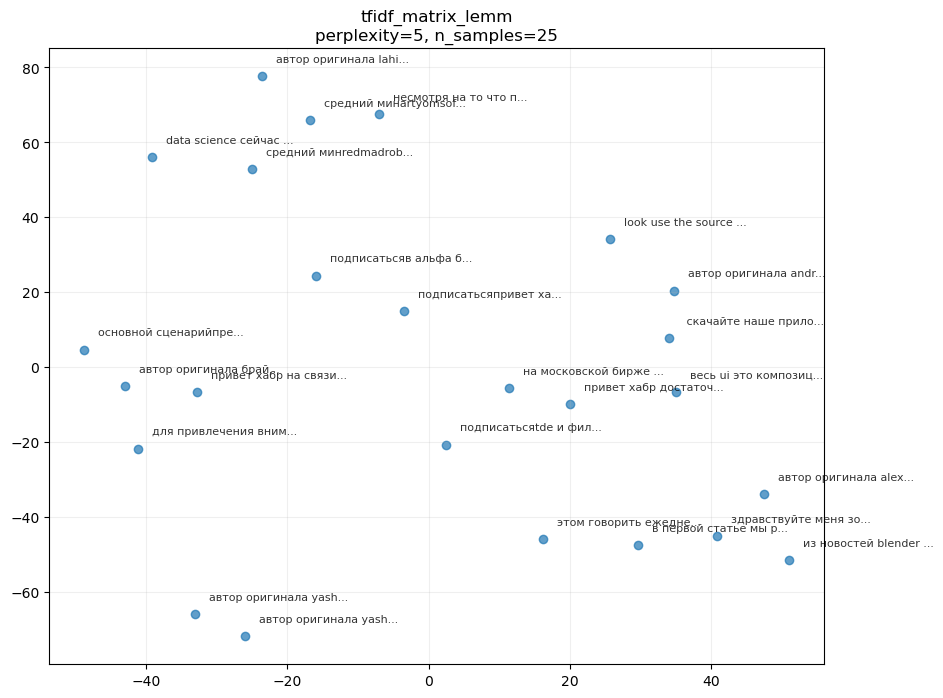

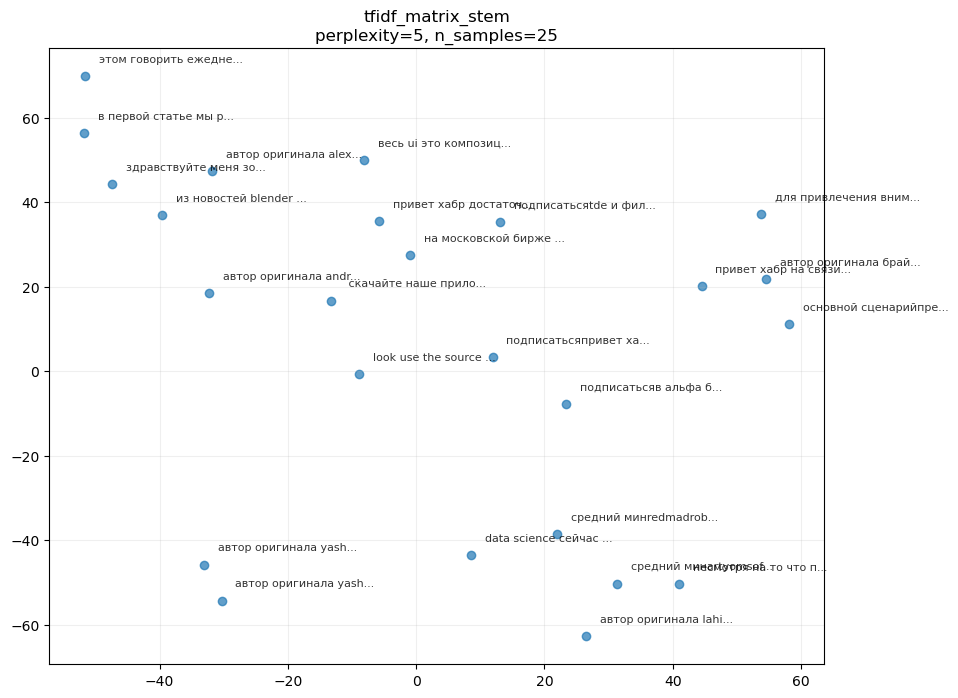

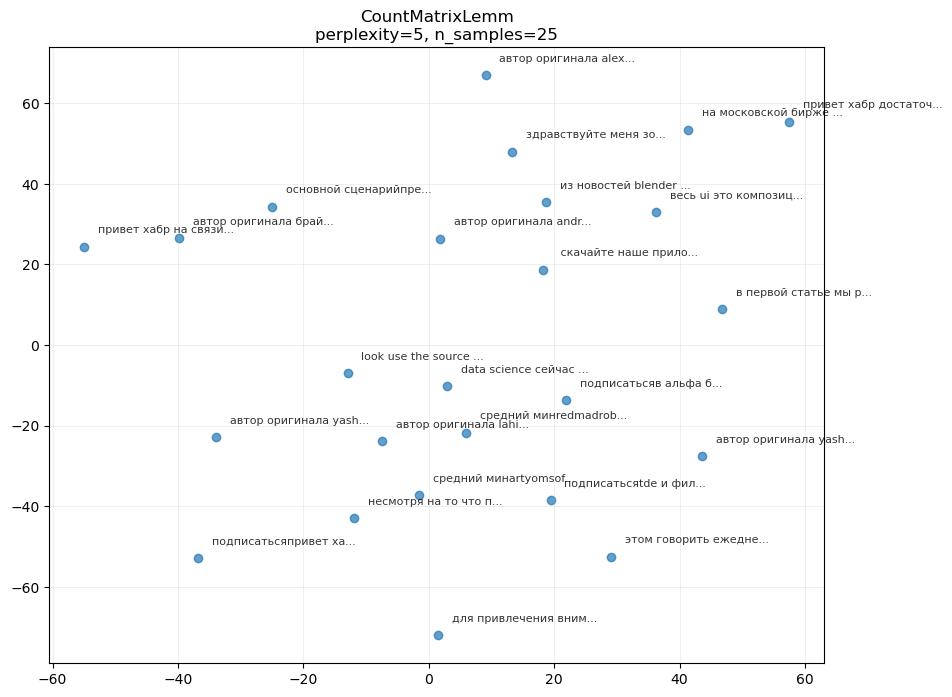

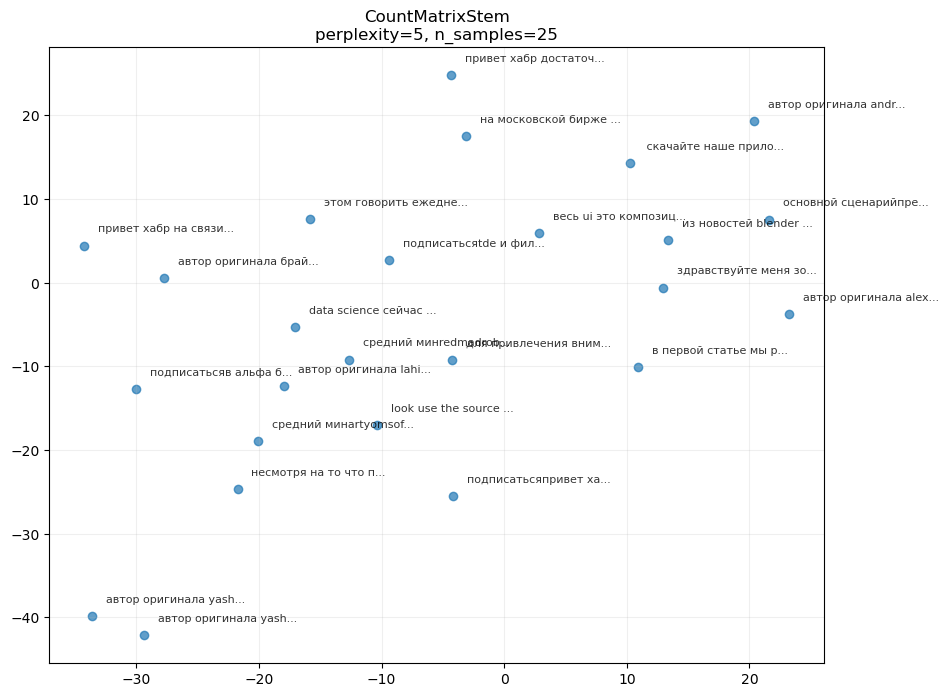

In [265]:
plot_tsne_optimized(tfidf_matrix_lemm, "tfidf_matrix_lemm", texts=df['TextArticle'].tolist())
plot_tsne_optimized(tfidf_matrix_stem, "tfidf_matrix_stem",texts=df['TextArticle'].tolist())
plot_tsne_optimized(count_matrix_lemm, 'CountMatrixLemm', texts=df['TextArticle'].tolist())
plot_tsne_optimized(count_matrix_stem, 'CountMatrixStem', texts=df['TextArticle'].tolist())

## Кластеризация Kmeans на основе векторов tfid, countMatrix

In [267]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

kmeans = KMeans(n_clusters=5, random_state=42)

tfid_labels_lemm = kmeans.fit_predict(tfidf_matrix_lemm)  
tfid_labels_stem = kmeans.fit_predict(tfidf_matrix_stem) 

silhouette_tfid_lemm = silhouette_score(tfidf_matrix_lemm, tfid_labels_lemm)
silhouette_tfid_stem = silhouette_score(tfidf_matrix_stem, tfid_labels_stem)

# Метрики для статей Habr

In [269]:
count_matrix_lemm_lables = kmeans.fit_predict(count_matrix_lemm)  
count_matrix_stem_lables = kmeans.fit_predict(count_matrix_stem) 

silhouette_count_matrix_lemm = silhouette_score(count_matrix_lemm, count_matrix_lemm_lables)
silhouette_count_matrix_stem = silhouette_score(count_matrix_stem, count_matrix_stem_lables)

In [270]:
import seaborn as sns

classifiers =["count_matrix_lemm", "count_matrix_stem", "tfid_lemm", "tfid_stem"]
log_cols = ["Classifier","Silhoette score"]
log = pd.DataFrame(columns=log_cols)

log["Classifier"] = classifiers
log["Silhoette score"] = [silhouette_count_matrix_lemm, silhouette_count_matrix_stem, silhouette_tfid_lemm, silhouette_tfid_stem]


In [271]:
log

,Classifier,Silhoette score
0,count_matrix_lemm,0.112060
1,count_matrix_stem,0.102705
2,tfid_lemm,0.019500
3,tfid_stem,0.036582


<Axes: title={'center': 'Vector'}, xlabel='Silhoette score', ylabel='Classifier'>

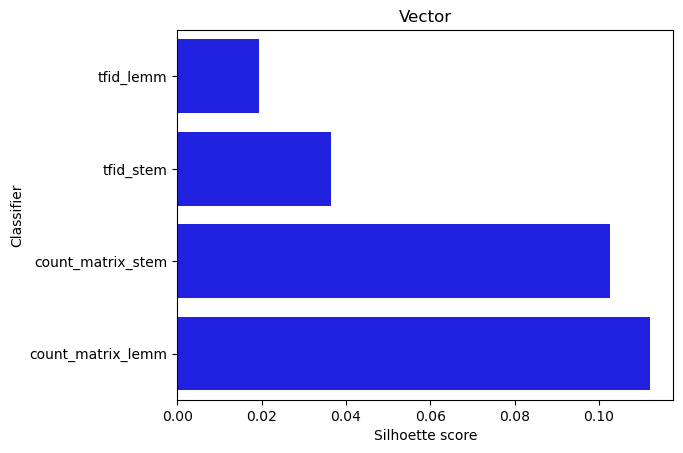

In [272]:

plt.xlabel('Silhoette score')
plt.title('Vector')

sns.barplot(x='Silhoette score', y='Classifier', data=log.sort_values(by='Silhoette score'), color="b")

In [273]:
kmeans_desc = KMeans(n_clusters=5, random_state=42)

tfid_labels_lemm_desc = kmeans_desc.fit_predict(tfidf_matrix_lemm_desc)  
tfid_labels_stem_desc = kmeans_desc.fit_predict(tfidf_matrix_stem_desc) 

silhouette_tfid_lemm_desc = silhouette_score(tfidf_matrix_lemm_desc, tfid_labels_lemm_desc)
silhouette_tfid_stem_desc = silhouette_score(tfidf_matrix_stem_desc, tfid_labels_stem_desc)

count_matrix_lemm_lables_desc = kmeans_desc.fit_predict(count_matrix_lemm_desc)  
count_matrix_stem_lables_desc = kmeans_desc.fit_predict(count_matrix_stem_desc) 

silhouette_count_matrix_lemm_desc = silhouette_score(count_matrix_lemm_desc, count_matrix_lemm_lables_desc)
silhouette_count_matrix_stem_desc = silhouette_score(count_matrix_stem_desc, count_matrix_stem_lables_desc)

classifiers =["count_matrix_lemm", "count_matrix_stem", "tfid_lemm", "tfid_stem"]
log_cols = ["Classifier","Silhoette score"]
log = pd.DataFrame(columns=log_cols)

log["Classifier"] = classifiers
log["Silhoette score"] = [silhouette_count_matrix_lemm_desc, silhouette_count_matrix_stem_desc, silhouette_tfid_lemm_desc, silhouette_tfid_stem_desc]


In [274]:
log

,Classifier,Silhoette score
0,count_matrix_lemm,-0.249501
1,count_matrix_stem,-0.258709
2,tfid_lemm,0.101642
3,tfid_stem,0.069593


<Axes: title={'center': 'Vector'}, xlabel='Silhoette score', ylabel='Classifier'>

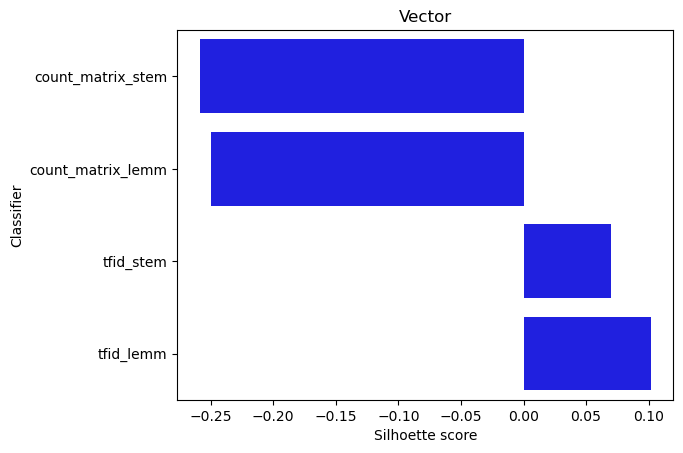

In [275]:

plt.xlabel('Silhoette score')
plt.title('Vector')

sns.barplot(x='Silhoette score', y='Classifier', data=log.sort_values(by='Silhoette score'), color="b")